In [1]:
# =========================
# 1. Imports
# =========================
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import plot_model

# =========================
# 2. Load MNIST Dataset
# =========================
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# =========================
# 3. Preprocessing
# =========================
# Normalize
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# Add channel dimension (important for CNN)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test  = x_test.reshape(-1, 28, 28, 1)

print("Train shape:", x_train.shape, y_train.shape)
print("Test shape :", x_test.shape, y_test.shape)

# =========================
# 4. Build CNN Model
# =========================
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')   # 10 classes
])

# =========================
# 5. Compile Model
# =========================
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # MNIST labels are integers
    metrics=['accuracy']
)

model.summary()

# =========================
# 6. Train Model
# =========================
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_test, y_test)
)

# =========================
# 7. Evaluate Model
# =========================
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")

# =========================
# 8. Save Model (Correct Way)
# =========================
model.save("mnist_cnn_model.h5")
print("Model saved successfully!")


Train shape: (60000, 28, 28, 1) (60000,)
Test shape : (10000, 28, 28, 1) (10000,)


c:\Users\shibu\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9245 - loss: 0.2439 - val_accuracy: 0.9825 - val_loss: 0.0507
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9755 - loss: 0.0825 - val_accuracy: 0.9872 - val_loss: 0.0367
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9813 - loss: 0.0633 - val_accuracy: 0.9897 - val_loss: 0.0317
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9844 - loss: 0.0509 - val_accuracy: 0.9902 - val_loss: 0.0301
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9872 - loss: 0.0420 - val_accuracy: 0.9901 - val_loss: 0.0272
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9889 - loss: 0.0366 - val_accuracy: 0.9910 - val_loss: 0.0282
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9900 - loss: 0.0320 - val_accuracy: 0.9923 - val_loss: 0.0265
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9912 - loss: 0.0285 - val_accuracy: 0.


Test Accuracy: 99.29%
Model saved successfully!


In [2]:
import pickle

path = r"c:\Users\shibu\Downloads\cnn_model1.pkl"

with open(path, "wb") as f:
    pickle.dump(model, f)

print("Model saved to Path")


Model saved to Path


In [2]:


import pickle

path = r"c:\Users\shibu\Downloads\cnn_model1.pkl"

with open(path, "rb") as f:
    model = pickle.load(f)

print("Model loaded successfully")



Model loaded successfully


c:\Users\shibu\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [3]:
import numpy as np

x_test = x_test.astype("float32") / 255.0




In [4]:

y_pred_probs = model.predict(x_test)


y_pred = y_pred_probs.argmax(axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [5]:
import numpy as np

y_true = y_test.flatten()  

accuracy = np.mean(y_pred == y_true)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.098


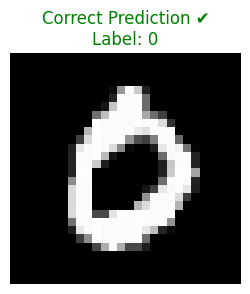

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Predict
y_pred = model.predict(x_test, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)

idx = 3  # 4th image (0-based index)

actual = y_test[idx]
predicted = y_pred_classes[idx]

if actual == predicted:
    plt.figure(figsize=(3, 3))
    plt.imshow(x_test[idx].reshape(28, 28), cmap="gray")
    plt.title(f"Correct Prediction ✔\nLabel: {actual}", color="green")
    plt.axis("off")
    plt.show()
else:
    print(
        f"4th image is NOT correctly predicted ❌\n"
        f"Actual: {actual}, Predicted: {predicted}"
    )
